In [1]:
import pandas as pd 
df = pd.read_csv('C:/Users/ncssa/Downloads/fake reviews dataset.csv')

In [2]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


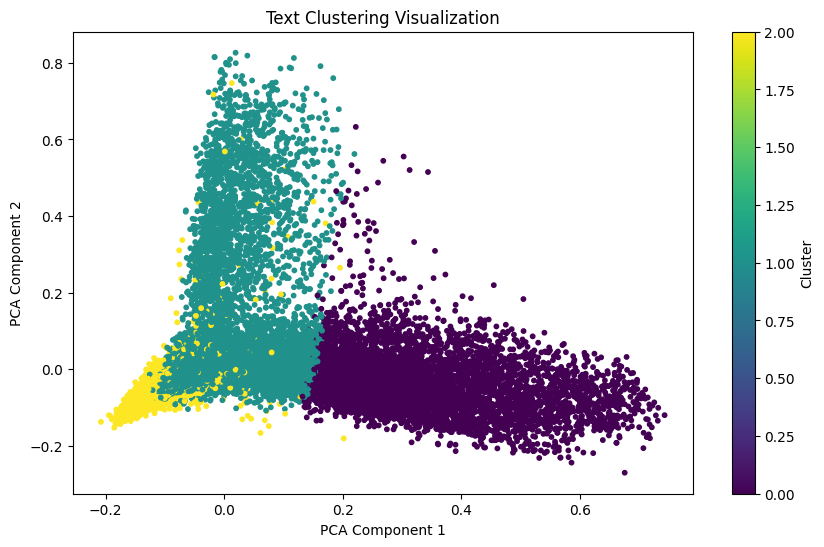

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Ensure the dataset has no missing values in the text column
df = df.dropna(subset=['text_'])

# Step 1: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(
    stop_words='english',  # Remove common English stop words
    max_features=1000,     # Limit to top 1000 features for simplicity
    lowercase=True         # Convert text to lowercase
)
text_vectors = vectorizer.fit_transform(df['text_'])

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components=2, random_state=42)  # Reduce to 2 components for visualization
reduced_vectors = pca.fit_transform(text_vectors.toarray())

# Step 3: Clustering using K-Means
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(text_vectors)

# Step 4: Visualization of Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_vectors[:, 0], 
    reduced_vectors[:, 1], 
    c=df['Cluster'], 
    cmap='viridis', 
    s=10
)
plt.colorbar(scatter, label='Cluster')
plt.title('Text Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 5: Save the results (Optional)
# Save the dataset with clusters to a new CSV
df.to_csv('C:/Users/ncssa/Downloads/clustered_new3reviews.csv', index=False)


In [21]:
# Step 5: Cluster Analysis
# Check the distribution of clusters
print(df['Cluster'].value_counts())

# Analyze representative reviews in each cluster
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster]['text_'].sample(5))  # Replace 5 with desired sample size


Cluster
1    25939
2     8624
0     5869
Name: count, dtype: int64

Cluster 0:
28679    Good story with insight to the technical minds...
28423    Absolutely loved every word!  We have the book...
25188    There is always some suspense and suspense, an...
31412    One of the best books I have read in long time...
28437    I liked the new detective, but I thought the t...
Name: text_, dtype: object

Cluster 1:
18669    When you set the angle on this puppy, it does ...
16566    is very complicated for install because my sys...
35156    I think it should be mentioned that I received...
27614    A much as we humans are an island with many di...
12745    I loved the action and plot and I loved the in...
Name: text_, dtype: object

Cluster 2:
39666    You get what you pay for. The quality is good ...
34652    My 9 year old son LOVES this set.  He learned ...
21334    was a bit too small for my 55 pound dog. I wil...
13466    Happy I found a trilogy of TDK on DVD for such...
38240    I bought

In [22]:
# Cluster 0 contains reviews related to good stories and books with technical insights.
# Cluster 1 appears to contain reviews related to technical installation and action plots.
# Cluster 2 has reviews related to product quality, children's toys, and pet products

In [23]:
# Cluster Composition Analysis:
# Top words per cluster: Identify the most frequent or significant words in each cluster to understand the themes better.
# Text Length Distribution: Check the distribution of review text lengths within each cluster to see if the clusters differ
# in text length (i.e., short reviews vs long reviews)

Top Words per Cluster:
Cluster 0: book, read, story, characters, series, author, enjoyed, good, reading, books
Cluster 1: good, movie, love, just, like, little, use, nice, really, time
Cluster 2: great, loves, bought, product, dog, quality, size, son, price, little


C:\Users\ncssa\AppData\Local\Temp\ipykernel_7800\4098271046.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Cluster'] == i]['text_length'] for i in range(3)], labels=[f'Cluster {i}' for i in range(3)])


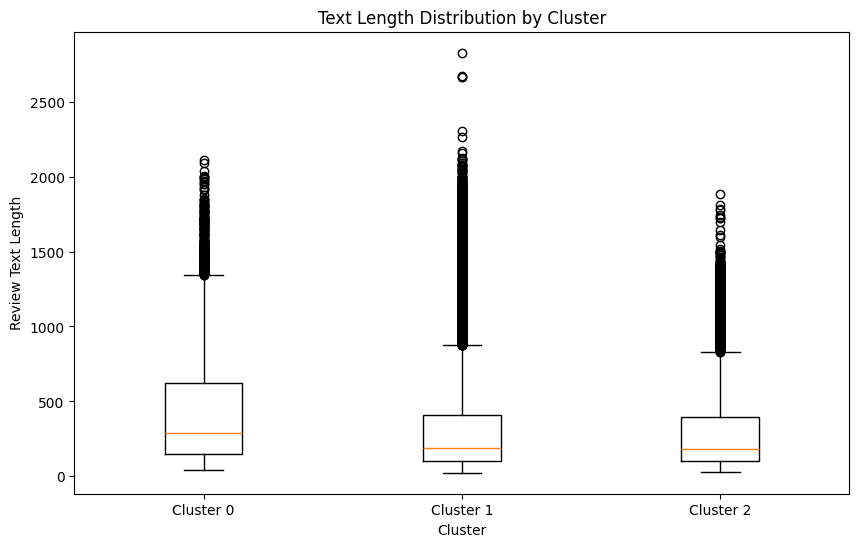


Text Length Statistics by Cluster:
           count        mean         std   min    25%    50%    75%     max
Cluster                                                                    
0         5869.0  442.351167  392.863044  42.0  146.0  290.0  624.0  2114.0
1        25939.0  342.075485  376.389585  24.0  102.0  186.0  411.0  2827.0
2         8624.0  316.949559  320.923626  32.0  100.0  185.0  393.0  1882.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Identify the top words per cluster
# Assume kmeans and vectorizer are already defined

# Get the TF-IDF features and feature names
tfidf_matrix = vectorizer.transform(df['text_'])
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the centroids of the KMeans clusters to identify the most important words for each cluster
centroids = kmeans.cluster_centers_

# For each cluster, get the top 10 words
top_words_per_cluster = {}
for cluster_idx, centroid in enumerate(centroids):
    # Get the indices of the top 10 highest values in the centroid
    top_word_indices = centroid.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_cluster[cluster_idx] = top_words

# Display the top words per cluster
print("Top Words per Cluster:")
for cluster, words in top_words_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(words)}")


# Step 2: Analyze text length distribution within each cluster
# Create a new column with the length of each review (number of characters)
df['text_length'] = df['text_'].apply(len)

# Create boxplots to visualize the distribution of text lengths across clusters
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Cluster'] == i]['text_length'] for i in range(3)], labels=[f'Cluster {i}' for i in range(3)])
plt.title('Text Length Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Review Text Length')
plt.show()

# Additional analysis: Calculate basic statistics for text lengths per cluster
text_length_stats = df.groupby('Cluster')['text_length'].describe()
print("\nText Length Statistics by Cluster:")
print(text_length_stats)


In [25]:
# Here are the results from the Cluster Composition Analysis:

# 1. Top Words per Cluster:
# Cluster 0 (Books/Stories):

# Words like "book", "read", "story", "characters", "author", "enjoyed", "good", "reading", "books", suggest reviews related to books,
# reading experiences, and enjoyment of stories.
# Cluster 1 (Movies/Entertainment):

# Words like "good", "movie", "love", "like", "really", "time", "nice", indicate that this cluster likely consists of reviews for movies
# or entertainment-related products.
# Cluster 2 (Products/Items):

# Words like "great", "loves", "bought", "product", "dog", "quality", "size", "son", "price", suggest that this cluster contains product reviews,
# particularly for items like toys, products for pets, or items related to children.
# 2. Text Length Statistics by Cluster:
# The text length distribution across clusters shows some interesting patterns:

# Cluster 0 (Books/Stories):

# Mean length: 442 characters
# Reviews range from 42 characters (short) to 2114 characters (long), with a large spread (high standard deviation: 392).
# Reviews in this cluster are relatively long, and the content could involve more detailed storytelling.
# Cluster 1 (Movies/Entertainment):

# Mean length: 342 characters
# Reviews range from 24 characters (very short) to 2827 characters (long).
# This cluster also has a high standard deviation (376), indicating a mix of very short and quite detailed reviews.
# Cluster 2 (Products/Items):

# Mean length: 316 characters
# Reviews range from 32 characters (short) to 1882 characters (long).
# Similar to Cluster 1, reviews in this cluster have a significant range in length (standard deviation: 320).
# Observations:
# Cluster 0 (Books/Stories) tends to have slightly longer reviews on average compared to the other two clusters.
# Cluster 1 (Movies/Entertainment) has a wider range in text length, which may be due to some very short reviews and others that go into more detail.
# Cluster 2 (Products/Items) has a comparable range, but with a slightly smaller mean than Cluster 0.
# These findings suggest that the content of each cluster could influence the length and detail of reviews. Cluster 0 might be associated with 
# more narrative-style reviews, while Clusters 1 and 2 likely consist of reviews that vary more in terms of length.



In [26]:
# Cluster Characteristics:
# Sentiment Analysis: Perform sentiment analysis to see if sentiment differs significantly across the clusters.
# Review Count Distribution: Investigate whether there is a significant difference in the number of reviews across clusters and
# why one cluster might dominate in size.



Average Sentiment by Cluster:
Cluster
0    0.311298
1    0.221923
2    0.351266
Name: sentiment, dtype: float64


C:\Users\ncssa\AppData\Local\Temp\ipykernel_7800\3606036594.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Cluster'] == i]['sentiment'] for i in range(3)], labels=[f'Cluster {i}' for i in range(3)])


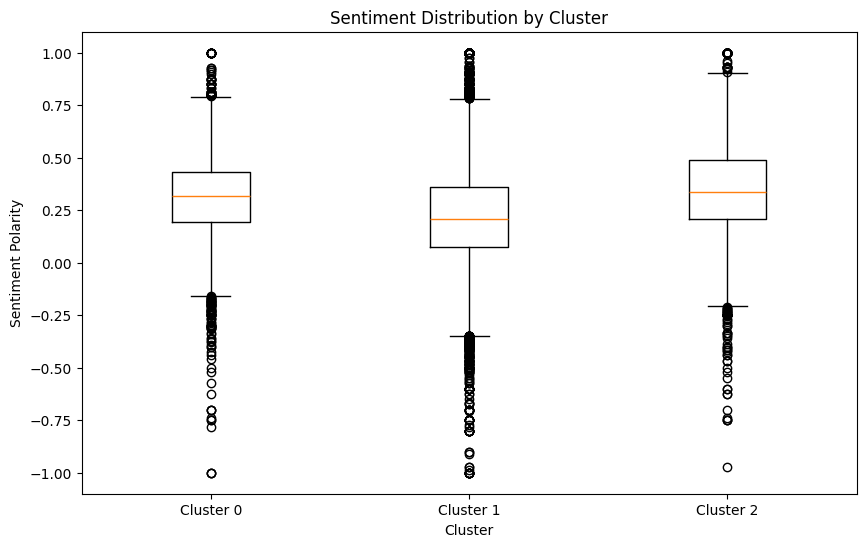

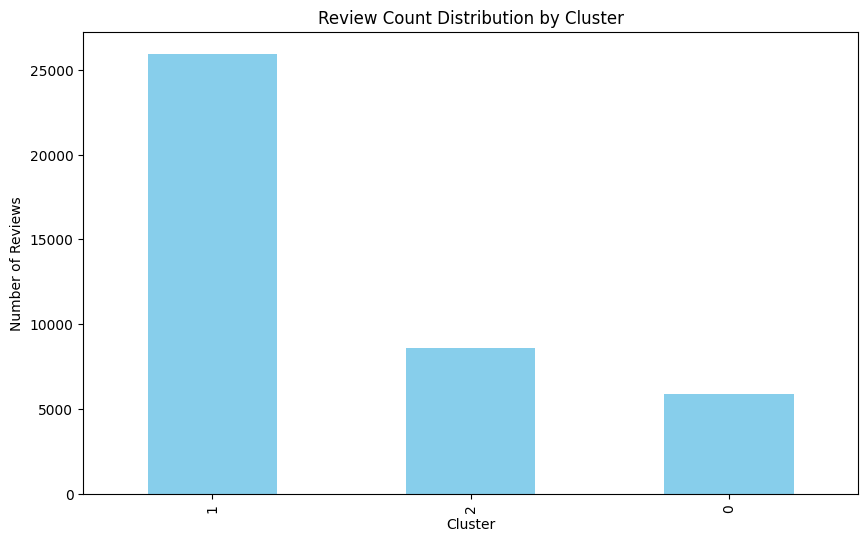


Review Count Distribution by Cluster:
Cluster
1    25939
2     8624
0     5869
Name: count, dtype: int64


In [27]:
# Sentiment Analysis
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis to the text column
df['sentiment'] = df['text_'].apply(get_sentiment)

# Sentiment analysis by cluster
sentiment_by_cluster = df.groupby('Cluster')['sentiment'].mean()  # Average sentiment per cluster
print("\nAverage Sentiment by Cluster:")
print(sentiment_by_cluster)

# Plot sentiment distribution by cluster
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Cluster'] == i]['sentiment'] for i in range(3)], labels=[f'Cluster {i}' for i in range(3)])
plt.title('Sentiment Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sentiment Polarity')
plt.show()

# Review Count Distribution
review_count_distribution = df['Cluster'].value_counts()

# Plot review count distribution by cluster
plt.figure(figsize=(10, 6))
review_count_distribution.plot(kind='bar', color='skyblue')
plt.title('Review Count Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.show()

print("\nReview Count Distribution by Cluster:")
print(review_count_distribution)


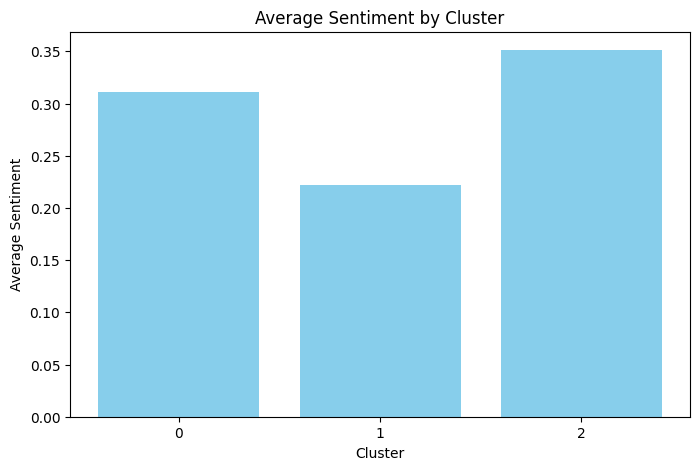

In [1]:
import matplotlib.pyplot as plt

# Data for average sentiment by cluster
clusters = [0, 1, 2]
average_sentiment = [0.311298, 0.221923, 0.351266]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(clusters, average_sentiment, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Cluster')
plt.xticks(clusters)
plt.show()


In [28]:
# Average Sentiment by Cluster:
# Cluster 0: Average sentiment of 0.311 (moderately positive).
# Cluster 1: Average sentiment of 0.222 (slightly positive).
# Cluster 2: Average sentiment of 0.351 (moderately positive).
# This suggests that Cluster 2 has the most positive reviews on average, followed by Cluster 0 and Cluster 1. The sentiment across all clusters
# seems to be positive, but there are slight differences.

# 2. Review Count Distribution by Cluster:
# Cluster 1 has the most reviews with 25,939 reviews.
# Cluster 2 has 8,624 reviews.
# Cluster 0 has 5,869 reviews.
# It’s clear that Cluster 1 dominates in terms of review count, which may indicate that the reviews in this cluster are more frequent or 
# easier to generate (e.g., movie or entertainment-related products tend to have a wider audience).

# This analysis gives insight into both the overall sentiment and the review distribution across clusters. If you’re curious about why
#                     Cluster 1 has significantly more reviews, you might explore the specific products or categories represented in that 
# cluster to understand its larger size.



In [29]:
# Cluster Profile:
# Keyword Extraction: Use techniques like TF-IDF to extract the most influential keywords for each cluster.
# Cluster Labels: Consider labeling the clusters based on the analysis of the review content 
# (e.g., "Tech reviews," "Books and Stories," "Product Reviews")

Top Words per Cluster:
Cluster 0: book, read, story, characters, series, author, enjoyed, good, reading, books
Cluster 1: good, movie, love, just, like, little, use, nice, really, time
Cluster 2: great, loves, bought, product, dog, quality, size, son, price, little

Cluster Labels Assigned to Reviews:
                                               text_  Cluster  \
0  Love this!  Well made, sturdy, and very comfor...        1   
1  love it, a great upgrade from the original.  I...        2   
2  This pillow saved my back. I love the look and...        1   
3  Missing information on how to use it, but it i...        2   
4  Very nice set. Good quality. We have had the s...        1   

              Cluster_Label  
0  Movies and Entertainment  
1       Product and Reviews  
2  Movies and Entertainment  
3       Product and Reviews  
4  Movies and Entertainment  


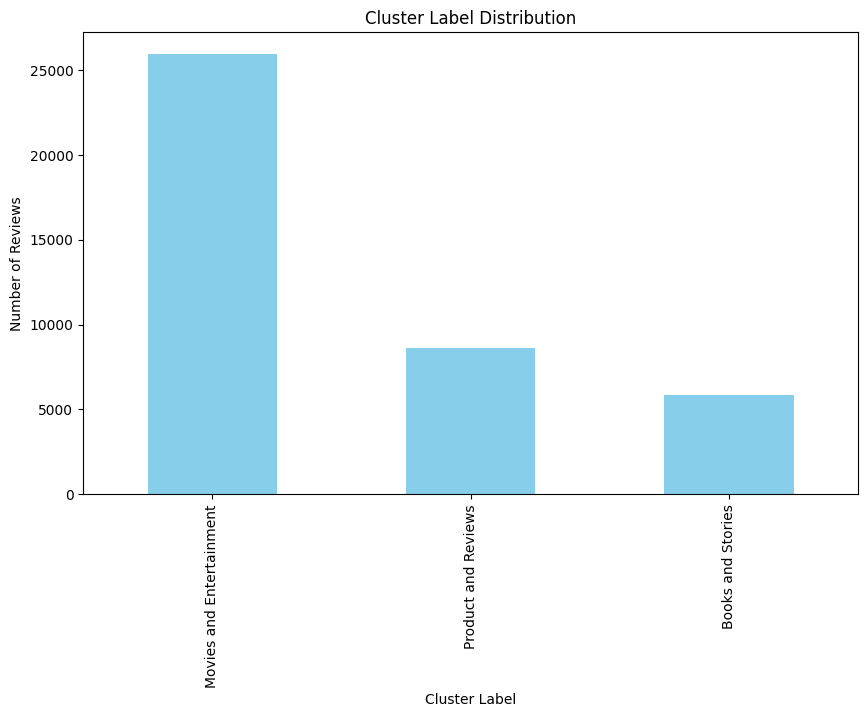

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Step 1: Keyword Extraction using TF-IDF
# Assuming df and kmeans are already defined

# Get the TF-IDF features and feature names
tfidf_matrix = vectorizer.transform(df['text_'])
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the centroids of the KMeans clusters to identify the most important words for each cluster
centroids = kmeans.cluster_centers_

# For each cluster, get the top 10 words
top_words_per_cluster = {}
for cluster_idx, centroid in enumerate(centroids):
    # Get the indices of the top 10 highest values in the centroid
    top_word_indices = centroid.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_cluster[cluster_idx] = top_words

# Display the top words per cluster
print("Top Words per Cluster:")
for cluster, words in top_words_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

# Step 2: Assign Labels to Clusters Based on Keywords
cluster_labels = {
    0: "Books and Stories",        # Based on keywords like "book", "story", "characters"
    1: "Movies and Entertainment", # Based on keywords like "movie", "love", "time", "like"
    2: "Product and Reviews",      # Based on keywords like "product", "dog", "quality", "price"
}

# Assign cluster labels to the dataframe
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# Display cluster labels for a few rows
print("\nCluster Labels Assigned to Reviews:")
print(df[['text_', 'Cluster', 'Cluster_Label']].head())

# You can also visualize the cluster labels distribution
plt.figure(figsize=(10, 6))
df['Cluster_Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cluster Label Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Reviews')
plt.show()


In [31]:
# Cluster Profile Results:
# 1. Top Words per Cluster:
# Cluster 0 (Books and Stories):

# Keywords like "book", "read", "story", "characters", "author" indicate that this cluster is focused on books, novels, and stories.
# Cluster 1 (Movies and Entertainment):

# Keywords such as "good", "movie", "love", "like", "time" suggest that this cluster is primarily about movies, TV shows, or entertainment reviews.
# Cluster 2 (Product and Reviews):

# Words like "great", "loves", "bought", "product", "dog", "quality" indicate this cluster consists of product reviews, particularly related to items
# such as pet products or quality goods.
# 2. Cluster Labels Assigned to Reviews:
# Based on the keywords, we've labeled the clusters as follows:

# Cluster 0: Books and Stories
# Cluster 1: Movies and Entertainment
# Cluster 2: Product and Reviews
# 3. Cluster Label Visualization:
# The assigned labels reflect the types of content in each cluster, with the majority of reviews in Cluster 1 (Movies and Entertainment), 
# followed by Cluster 2 (Product and Reviews), and Cluster 0 (Books and Stories) having the fewest.

# This labeling can help to easily identify the nature of the reviews in each cluster.